In [43]:
!pip install tensorflow
!pip install matplotlib
!pip install numpy


In [60]:
from re import A
!unzip -o food-101.zip -d food-101


Streaming output truncated to the last 5000 lines.
  inflating: food-101/food-101/food-101/images/tacos/1030289.jpg  
  inflating: food-101/food-101/food-101/images/tacos/1033196.jpg  
  inflating: food-101/food-101/food-101/images/tacos/1036030.jpg  
  inflating: food-101/food-101/food-101/images/tacos/1042175.jpg  
  inflating: food-101/food-101/food-101/images/tacos/1044043.jpg  
  inflating: food-101/food-101/food-101/images/tacos/1058697.jpg  
  inflating: food-101/food-101/food-101/images/tacos/1059239.jpg  
  inflating: food-101/food-101/food-101/images/tacos/1059326.jpg  
  inflating: food-101/food-101/food-101/images/tacos/1066762.jpg  
  inflating: food-101/food-101/food-101/images/tacos/1070967.jpg  
  inflating: food-101/food-101/food-101/images/tacos/1073468.jpg  
  inflating: food-101/food-101/food-101/images/tacos/1075296.jpg  
  inflating: food-101/food-101/food-101/images/tacos/1085243.jpg  
  inflating: food-101/food-101/food-101/images/tacos/108529.jpg  
  inflating:

In [5]:
!rm -rf /content/food-101/food-101/

In [10]:
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz

--2024-08-13 20:45:21--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2024-08-13 20:45:22--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz’

food-101.tar.gz     100%[===================>]   4.65G  32.1MB/s    in 2m 31s  

2024-08-13 20:47:54 (31.5 MB/s) - ‘food-101.tar.gz’ saved [4996278331/4996278331]



In [11]:
!tar -xvzf food-101.tar.gz

Streaming output truncated to the last 5000 lines.
food-101/images/cannoli/695879.jpg
food-101/images/cannoli/1767088.jpg
food-101/images/cannoli/3201965.jpg
food-101/images/cannoli/3778102.jpg
food-101/images/cannoli/2674065.jpg
food-101/images/cannoli/1169899.jpg
food-101/images/cannoli/1378086.jpg
food-101/images/cannoli/803909.jpg
food-101/images/cannoli/1067240.jpg
food-101/images/cannoli/3002709.jpg
food-101/images/cannoli/2612632.jpg
food-101/images/cannoli/3627612.jpg
food-101/images/cannoli/1798703.jpg
food-101/images/cannoli/560632.jpg
food-101/images/cannoli/512468.jpg
food-101/images/cannoli/2331523.jpg
food-101/images/cannoli/3118302.jpg
food-101/images/cannoli/1499412.jpg
food-101/images/cannoli/1557459.jpg
food-101/images/cannoli/146566.jpg
food-101/images/cannoli/96922.jpg
food-101/images/cannoli/1699562.jpg
food-101/images/cannoli/730051.jpg
food-101/images/cannoli/2177977.jpg
food-101/images/cannoli/2767028.jpg
food-101/images/cannoli/6564.jpg
food-101/images/cannoli/

In [12]:
!ls /content/food-101/images

apple_pie	    crab_cakes		     gyoza		    poutine
baby_back_ribs	    creme_brulee	     hamburger		    prime_rib
baklava		    croque_madame	     hot_and_sour_soup	    pulled_pork_sandwich
beef_carpaccio	    cup_cakes		     hot_dog		    ramen
beef_tartare	    deviled_eggs	     huevos_rancheros	    ravioli
beet_salad	    donuts		     hummus		    red_velvet_cake
beignets	    dumplings		     ice_cream		    risotto
bibimbap	    edamame		     lasagna		    samosa
bread_pudding	    eggs_benedict	     lobster_bisque	    sashimi
breakfast_burrito   escargots		     lobster_roll_sandwich  scallops
bruschetta	    falafel		     macaroni_and_cheese    seaweed_salad
caesar_salad	    filet_mignon	     macarons		    shrimp_and_grits
cannoli		    fish_and_chips	     miso_soup		    spaghetti_bolognese
caprese_salad	    foie_gras		     mussels		    spaghetti_carbonara
carrot_cake	    french_fries	     nachos		    spring_rolls
ceviche		    french_onion_soup	     omelette		    steak
cheesecake	    french_toas

In [13]:
import tensorflow as tf
import matplotlib.image as img
import numpy as np
from collections import defaultdict
from shutil import copy, copytree, rmtree
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os
import random
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow import keras
import cv2


In [9]:
print(tf.__version__)
print(tf.test.gpu_device_name())


2.17.0



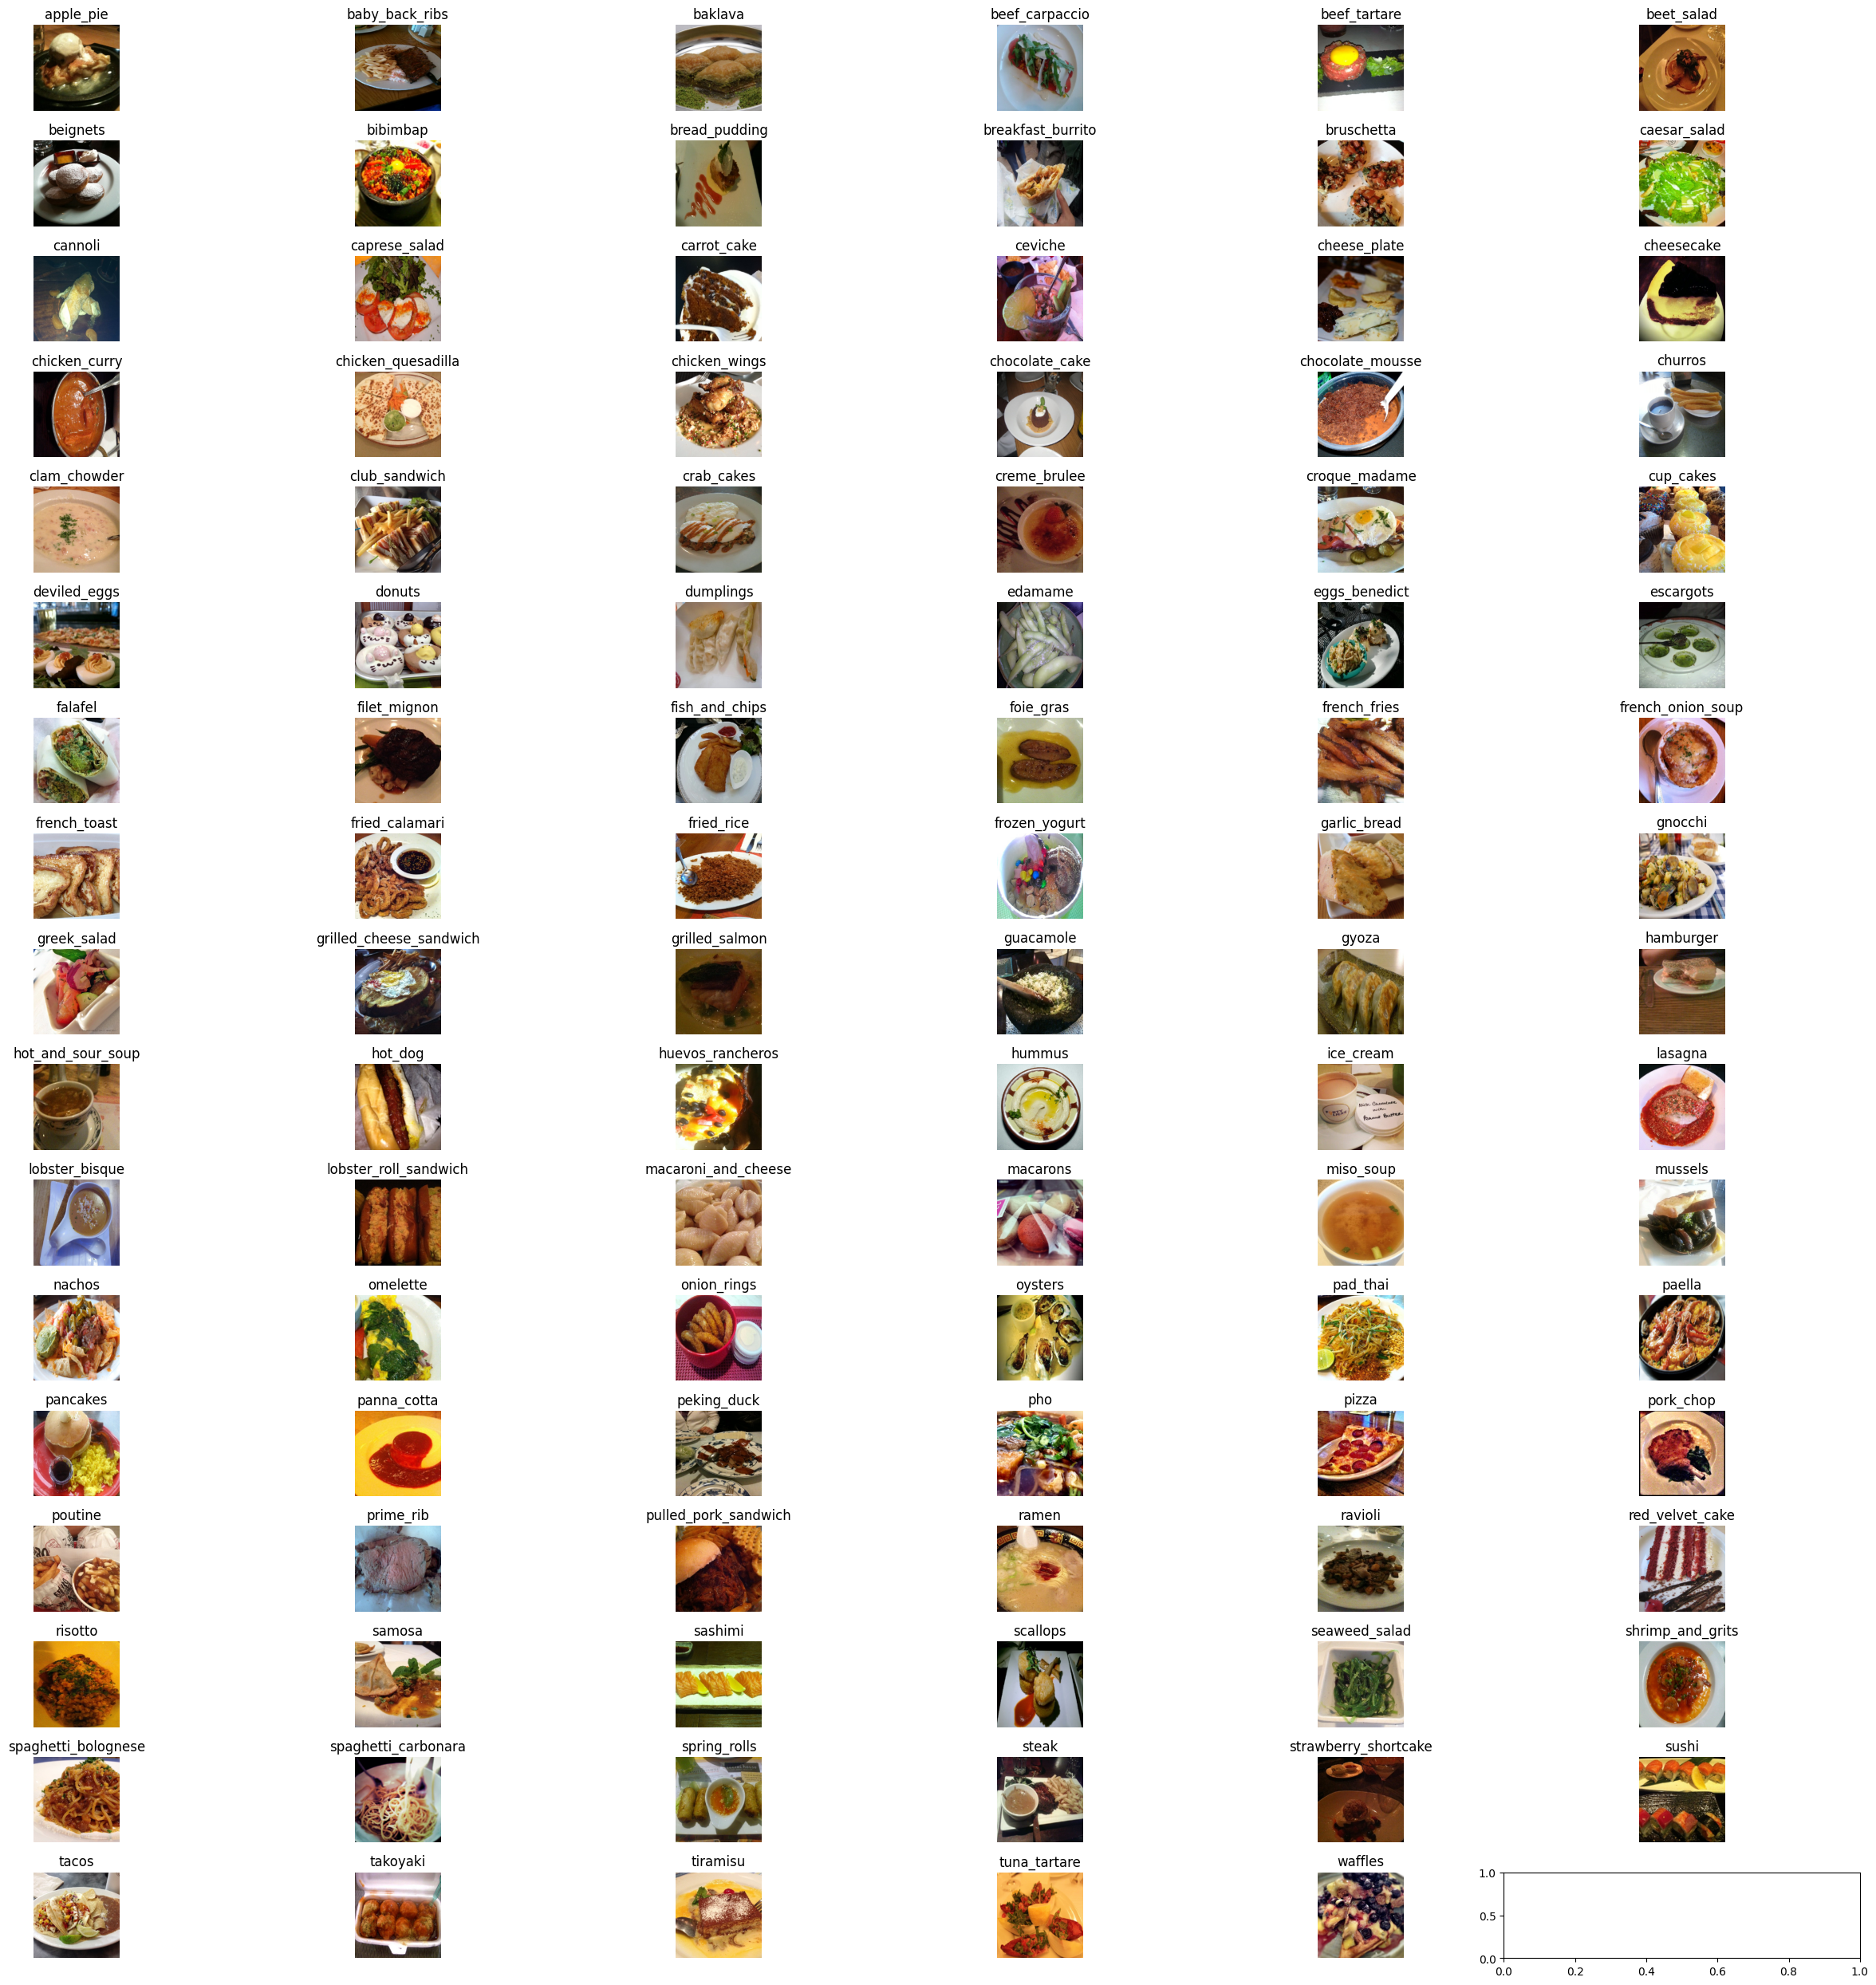

In [14]:
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, figsize=(25, 25))
ax = ax.flatten()

def load_img(filepath):
    img = image.load_img(filepath, target_size=(299, 299))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img

for i, category in enumerate(sorted(os.listdir('/content/food-101/images'))):
    img_file = random.choice(os.listdir(f'/content/food-101/images/{category}'))
    img_path = f'/content/food-101/images/{category}/{img_file}'
    ax[i].imshow(image.load_img(img_path, target_size=(299, 299)))
    ax[i].set_title(category)
    ax[i].axis('off')

plt.tight_layout()
plt.show()


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

batch_size = 32
img_height = 299
img_width = 299


data_dir = '/content/food-101/images'


datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
)


train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical',
    shuffle=True,
)


val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical',
    shuffle=True,
)


Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.


In [16]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model


base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_data.class_indices), activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=predictions)


for layer in base_model.layers:
    layer.trainable = False


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)


In [ ]:
val_loss, val_accuracy = model.evaluate(val_data)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')


In [ ]:
model.save('food_recognition_model.h5')


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('food_recognition_model.h5')

# Predict on a new image
img_path = 'path_to_new_image.jpg'
img = load_img(img_path)
prediction = model.predict(img)
predicted_class = np.argmax(prediction, axis=-1)
print(f'Predicted class: {list(train_data.class_indices.keys())[predicted_class[0]]}')
